In [12]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

## Video 1

In [31]:
is_red_path = Path('/Users/yefan/Desktop/rot2/rot2-project/data/2024-01-30_latency_test_gantry_direct/is_red1.npy')
is_red = np.load(is_red_path)
y_loc_path = Path('/Users/yefan/Desktop/rot2/rot2-project/data/2024-01-30_latency_test_gantry_direct/y_loc1.npy')
y_loc = np.load(y_loc_path)

print(is_red.shape)
print(y_loc.shape)

(4592,)
(4592,)


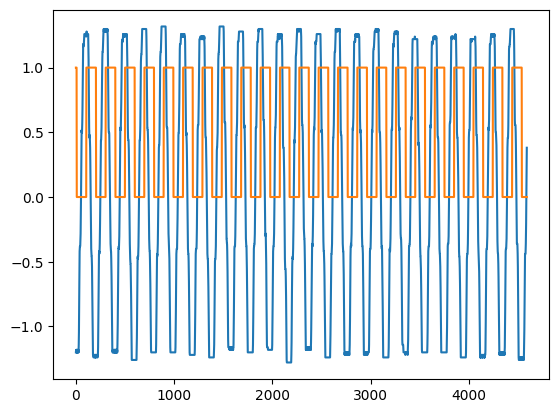

In [14]:
n_frames = is_red.shape[0]
plt.plot(((y_loc - np.mean(y_loc)) / np.std(y_loc)))
plt.plot(is_red)

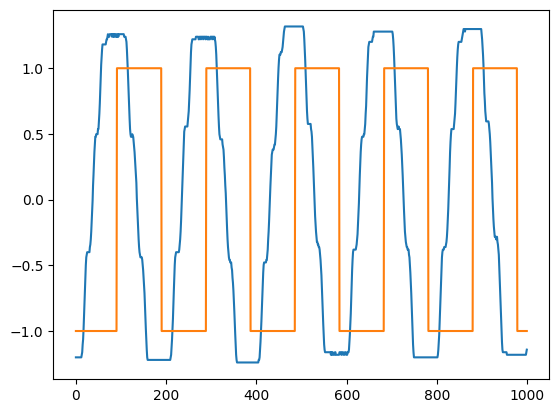

In [20]:
y_loc_diff = np.diff(y_loc)
y_loc_diff = y_loc
is_red_diff = np.diff(is_red)
is_red_plot = is_red
start, end = 1000, 2000

plt.plot(((y_loc_diff - np.mean(y_loc_diff)) / np.std(y_loc_diff))[start:end])
plt.plot((is_red_plot[start:end] - 0.5) * 2)

In [21]:
color_rising_idx = np.where(is_red_diff == 1)[0]
print(color_rising_idx)
color_falling_idx = np.where(is_red_diff == -1)[0]
print(color_falling_idx)

[ 105  302  499  696  893 1090 1288 1485 1682 1879 2076 2273 2470 2667
 2864 3061 3258 3455 3653 3850 4047 4244 4441]
[   7  204  401  598  795  992 1189 1386 1583 1780 1977 2174 2371 2569
 2766 2963 3160 3357 3554 3751 3948 4145 4342 4539]


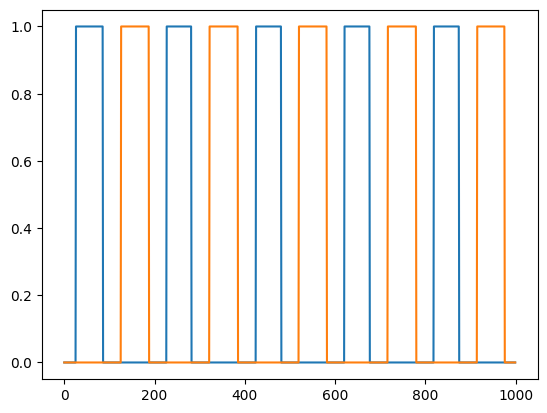

In [22]:
y_loc_norm = (y_loc_diff - np.mean(y_loc_diff)) / np.std(y_loc_diff)
pos_high_idx = y_loc_norm > 1
pos_low_idx = y_loc_norm < -1

a = 3000
b = 4000
plt.plot(pos_high_idx[a:b])
plt.plot(pos_low_idx[a:b])

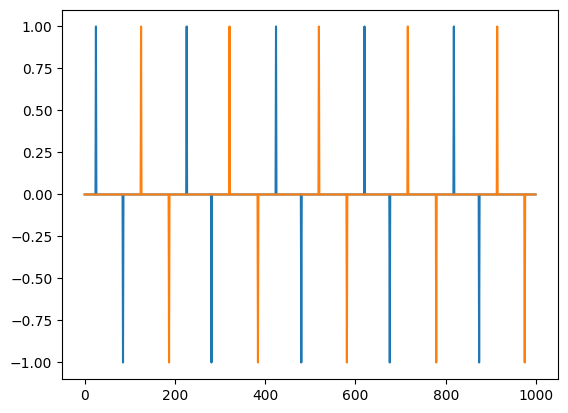

In [23]:
pos_high_diff = np.diff(pos_high_idx.astype(int))
pos_low_diff = np.diff(pos_low_idx.astype(int))
plt.plot(pos_high_diff[a:b])
plt.plot(pos_low_diff[a:b])


In [24]:
pos_high_falling = np.where(pos_high_diff == -1)[0]
pos_low_rising = np.where(pos_low_diff == -1)[0]
print(len(pos_high_falling))
print(len(pos_low_rising))
print(len(color_rising_idx))
print(len(color_falling_idx))

23
24
23
24


[   7  204  401  598  795  992 1189 1386 1583 1780 1977 2174 2371 2569
 2766 2963 3160 3357 3554 3751 3948 4145 4342 4539]
[  31  228  425  621  819 1016 1213 1410 1607 1805 2001 2197 2396 2592
 2790 2987 3187 3384 3581 3779 3975 4172 4369 4566]


Text(0.5, 0, 'Latency (s)')

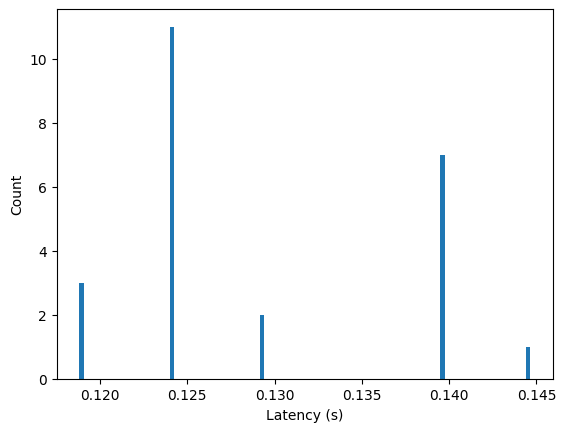

In [28]:
camera_fps = 193.57
s_per_frame = 1 / camera_fps
print(color_falling_idx)
print(pos_low_rising)
high_latency = pos_low_rising - color_falling_idx
plt.hist(high_latency * s_per_frame, bins=100)
plt.ylabel('Count')
plt.xlabel('Latency (s)')

[ 105  302  499  696  893 1090 1288 1485 1682 1879 2076 2273 2470 2667
 2864 3061 3258 3455 3653 3850 4047 4244 4441]
[ 129  327  524  721  918 1114 1312 1508 1705 1903 2102 2297 2494 2691
 2888 3085 3281 3480 3676 3874 4071 4267 4464]


Text(0.5, 0, 'Latency (s)')

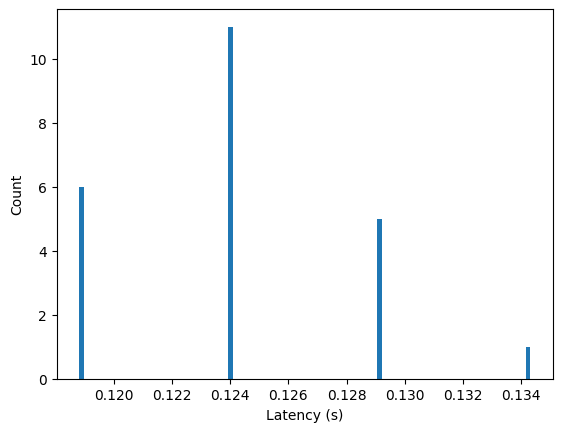

In [38]:
print(color_rising_idx)
print(pos_high_falling)
high_latency = pos_high_falling - color_rising_idx
plt.hist(high_latency * s_per_frame, bins=100)
plt.ylabel('Count')
plt.xlabel('Latency (s)')

## Video

In [33]:
is_red_path = Path('/Users/yefan/Desktop/rot2/rot2-project/data/2024-01-30_latency_test_gantry_direct/is_red.npy')
is_red = np.load(is_red_path)
y_loc_path = Path('/Users/yefan/Desktop/rot2/rot2-project/data/2024-01-30_latency_test_gantry_direct/y_loc.npy')
y_loc = np.load(y_loc_path)

print(is_red.shape)
print(y_loc.shape)

(6184,)
(6184,)


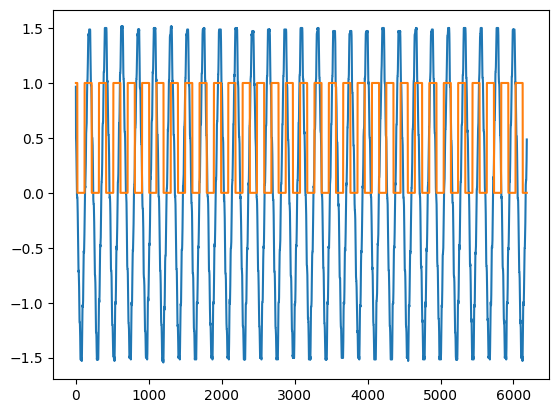

In [36]:
n_frames = is_red.shape[0]
plt.plot(((y_loc - np.mean(y_loc)) / np.std(y_loc)))
plt.plot(is_red)

further analysis is no longer required since clearly the gantry is out of sync with the colors